In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('./dataset/regressor_train_val_test/data_train.csv')
val_data = pd.read_csv('./dataset/regressor_train_val_test/data_val.csv')
test_data = pd.read_csv('./dataset/regressor_train_val_test/data_test.csv')

combined_features = pd.concat([train_data, val_data, test_data], ignore_index=True)

tsne = TSNE(n_components=2, perplexity=50)
tsne_transformed = tsne.fit_transform(combined_features)

train_tsne = tsne_transformed[:len(train_data)]
val_tsne = tsne_transformed[len(train_data):len(train_data) + len(val_data)]
test_tsne = tsne_transformed[len(train_data) + len(val_data):len(train_data) + len(val_data) + len(test_data)]

print(train_tsne.shape)
print(val_tsne.shape)
print(test_tsne.shape)

output_path = './Result/regressor/t-SNE/'
np.savetxt(output_path + 't-SNE_train_result.csv', train_tsne, delimiter=',')
np.savetxt(output_path + 't-SNE_val_result.csv', val_tsne, delimiter=',')
np.savetxt(output_path + 't-SNE_test_result.csv', test_tsne, delimiter=',')

(4143, 2)
(518, 2)
(518, 2)


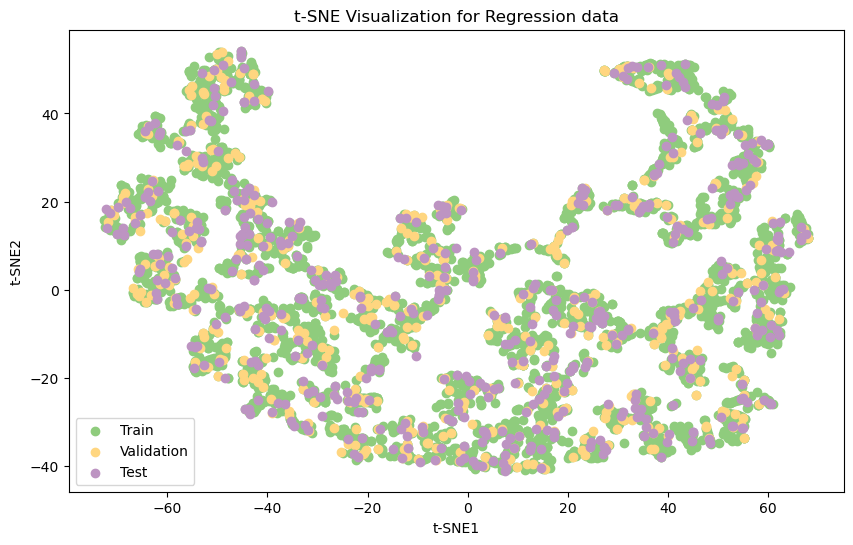

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(train_tsne[:, 0], train_tsne[:, 1], label='Train', c=[(0.56,0.80,0.49)], alpha=1)
plt.scatter(val_tsne[:, 0], val_tsne[:, 1], label='Validation', c=[(1.00,0.84,0.50)], alpha=1)
plt.scatter(test_tsne[:, 0], test_tsne[:, 1], label='Test', c=[(0.74,0.58,0.76)], alpha=1)

plt.xlabel('t-SNE1')  
plt.ylabel('t-SNE2')
plt.title('t-SNE Visualization for Regression data')
plt.legend()
plt.savefig(output_path +'t-SNE_regression_visualization.png', format='png')
plt.show()